In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pymysql

In [ ]:
!pip install pymysql

In [2]:
from pylab import rcParams

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [3]:
pd.set_option('max_columns', 40)
pd.set_option('max_rows', 40)

In [4]:
%matplotlib inline

In [5]:
times = []
start_time, end_time = 0, 23

if start_time < end_time:
    times.extend(range(start_time, end_time))
    times.append(end_time)
    
print(times)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [6]:
#Functionality / alerts code
location = input("Enter your location:")
print(location)

temperature = 0
water_temps = []

#Generates an example dataset
for i in range(24):
    temperature = np.random.randint(0, 50)
    #temperature = int(input("Temperature(℃)"))
    print(temperature,"℃")
    water_temps.append(temperature)

Enter your location:Mahurangi Harbour
Mahurangi Harbour
24 ℃
9 ℃
49 ℃
25 ℃
13 ℃
40 ℃
35 ℃
2 ℃
40 ℃
15 ℃
9 ℃
11 ℃
13 ℃
28 ℃
16 ℃
38 ℃
20 ℃
31 ℃
40 ℃
18 ℃
33 ℃
1 ℃
3 ℃
7 ℃


In [7]:
print(water_temps)

[24, 9, 49, 25, 13, 40, 35, 2, 40, 15, 9, 11, 13, 28, 16, 38, 20, 31, 40, 18, 33, 1, 3, 7]


In [8]:
pH = []
db = pymysql.connect(host='20.214.188.216', port=3306, user='root', password='Wx123456.', db='aquadatabase',
                     charset='utf8')
cursor = db.cursor()

#Generates an example dataset
sql_pH = "select ph from web_ph";
cursor.execute(sql_pH)
results_pH = cursor.fetchall()

for i in results_pH:

    for p in i:
        p = float(p)
        pH.append(p)

db.commit()
cursor.close()
db.close()
print(pH)

[6.7, 7.1, 8.3, 9.1, 6.9, 6.4, 7.3, 8.4, 8.4, 8.2, 9.2, 6.5, 6.7, 6.6, 7.8, 8.0, 7.4, 7.2, 7.1, 6.9, 7.3, 7.4, 10.4, 9.1]


In [9]:
time = pd.DataFrame(times, columns = ['Time'])
time

,Time
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [10]:
temperature_data = pd.DataFrame(water_temps, columns = ['Temperature'])
temperature_data

,Temperature
0,24
1,9
2,49
3,25
4,13
5,40
6,35
7,2
8,40
9,15


In [11]:
pH_data = pd.DataFrame(pH, columns = ['pH'])
pH_data

,pH
0,6.7
1,7.1
2,8.3
3,9.1
4,6.9
5,6.4
6,7.3
7,8.4
8,8.4
9,8.2


In [12]:
oyster_data = pd.concat([time, temperature_data, pH_data], axis = 1)
oyster_data

,Time,Temperature,pH
0,0,24,6.7
1,1,9,7.1
2,2,49,8.3
3,3,25,9.1
4,4,13,6.9
5,5,40,6.4
6,6,35,7.3
7,7,2,8.4
8,8,40,8.4
9,9,15,8.2


In [13]:
oyster_data.to_csv("../datasets/oyster_data.csv")

In [14]:
alerts = []
for temp in water_temps:
    if temp < 12 or temp > 35:
        print("Temperature outside of desirable range")
        alerts.append(temp)
    else:
        print("Temperature within desirable range")

Temperature within desirable range
Temperature outside of desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature outside of desirable range
Temperature outside of desirable range


In [15]:
print(alerts)

[9, 49, 40, 2, 40, 9, 11, 38, 40, 1, 3, 7]


In [16]:
pH_alerts = []
for num in pH:
    num = float(num)
    if num < 4.0 or num > 11.0:
        print("pH outside of desirable range")
        pH_alerts.append(num)
    else:
        print("pH within desirable range")

pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range
pH within desirable range


In [17]:
print(pH_alerts)

[]


Text(0.5, 1.0, 'Hourly Temperature Of The Water in the Mahurangi Harbour Region Over A 24 Hour Period')

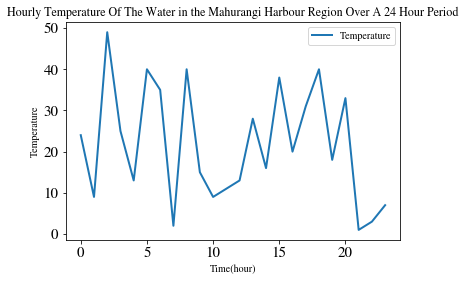

In [18]:
oyster_data.plot(x = "Time", y = "Temperature")
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.ylabel('Temperature')
plt.xlabel('Time(hour)')
plt.title('Hourly Temperature Of The Water in the {} Region Over A 24 Hour Period'.format(location))

Text(0.5, 1.0, 'Hourly pH Of The Water in the Mahurangi Harbour Region Over A 24 Hour Period')

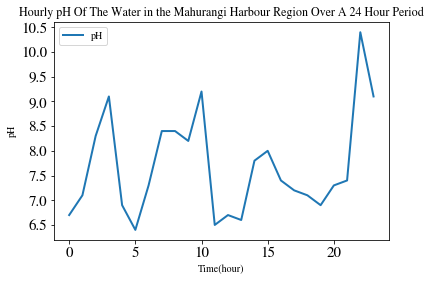

In [19]:
oyster_data.plot(x = "Time", y = "pH")
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.ylabel('pH')
plt.xlabel('Time(hour)')
plt.title('Hourly pH Of The Water in the {} Region Over A 24 Hour Period'.format(location))

In [20]:
bounds = [0,4,7,10,12,14]
colors = ["red", "yellow", "green", "blue", "purple"]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

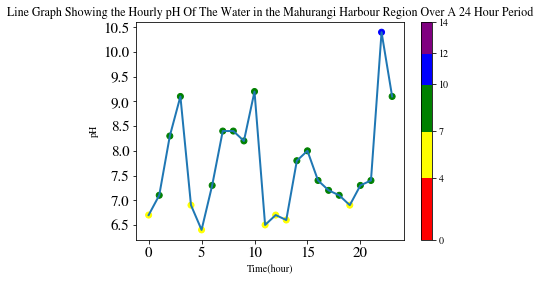

In [21]:
fig, ax = plt.subplots()
sc = ax.scatter(oyster_data.Time, oyster_data.pH, c=oyster_data.pH.values, cmap=cmap, norm=norm)
ax.plot(oyster_data.Time, oyster_data.pH)
fig.colorbar(sc, spacing="proportional")
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.ylabel('pH')
plt.xlabel('Time(hour)')
plt.title('Line Graph Showing the Hourly pH Of The Water in the {} Region Over A 24 Hour Period'.format(location))
plt.savefig('../datasets/temperature.jpg')

In [22]:
bounds = [0,12,20,25,35,50]
colors = ["blue", "lightblue", "yellow", "orange", "red"]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

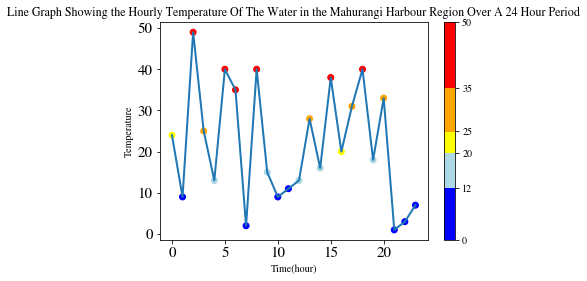

In [23]:
fig, ax = plt.subplots()
sc = ax.scatter(oyster_data.Time, oyster_data['Temperature'], c=oyster_data.Temperature.values, cmap=cmap, norm=norm)
ax.plot(oyster_data.Time, oyster_data.Temperature)
fig.colorbar(sc, spacing="proportional")
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.ylabel('Temperature')
plt.xlabel('Time(hour)')
plt.title('Line Graph Showing the Hourly Temperature Of The Water in the {} Region Over A 24 Hour Period'.format(location))
plt.savefig('../datasets/pH.jpg')